In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/fake_jobs.csv')

# Preview the data
print(df.head())

   title_length  description_length  has_company_profile is_fake
0            72                 740                    1     yes
1            95                 476                    0      no
2            60                 662                    1     yes
3            34                 317                    0      no
4            67                 884                    0     yes


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the target column
label_encoder = LabelEncoder()
df['is_fake'] = label_encoder.fit_transform(df['is_fake'])  # yes -> 1, no -> 0

# Features and target
X = df[['title_length', 'description_length', 'has_company_profile']]
y = df['is_fake']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [4]:
from sklearn.metrics import classification_report, accuracy_score

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.62      0.50         8
           1       0.62      0.42      0.50        12

    accuracy                           0.50        20
   macro avg       0.52      0.52      0.50        20
weighted avg       0.54      0.50      0.50        20



In [5]:
# Example job posting features
sample = [[50, 500, 1]]  # [title_length, description_length, has_company_profile]
prediction = model.predict(sample)

print("Fake" if prediction[0] == 1 else "Real")

Fake


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


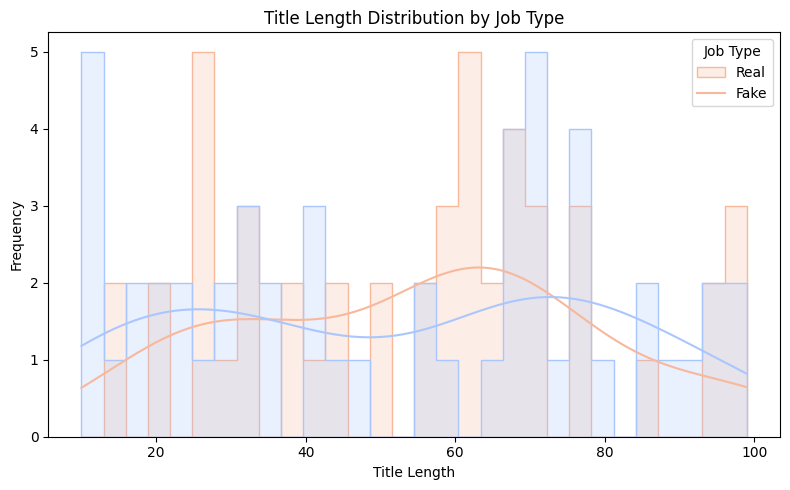

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='title_length', hue='is_fake', bins=30, kde=True, palette='coolwarm', element='step')
plt.title("Title Length Distribution by Job Type")
plt.xlabel("Title Length")
plt.ylabel("Frequency")
plt.legend(title='Job Type', labels=['Real', 'Fake'])
plt.tight_layout()
plt.show()